# Users

In [1]:
#Specify all data paths
stackQ_path = "/Users/Ye/Desktop/BT4222/Project/SampleQuestions.csv"
stackA_path = "/Users/Ye/Desktop/BT4222/Project/SampleAnswers.csv"
users_path = "/Users/Ye/Desktop/BT4222/Project/Users.csv"
badges_path = "/Users/Ye/Desktop/BT4222/Project/Badges.csv"

## Preprocessing

In [2]:
#import all packages needed
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
# stack_question = pd.read_csv(stackQ_path).rename(columns={'OwnerUserId':'UserID'})
# stack_answer = pd.read_csv(stackA_path).rename(columns={'OwnerUserId':'UserID'})

In [4]:
# %store stack_question
# %store stack_answer

In [5]:
# %store -r stack_question
# %store -r stack_answer

In [6]:
# stack_question.head()

,Id,UserID,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
# stack_answer.head()

,Id,UserID,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


### Questions

In [8]:
#Get the number of questions asked by each user 
# countQ = pd.DataFrame(stack_question.groupby('UserID')['Id'].count())

In [69]:
#%store countQ

Stored 'countQ' (DataFrame)


In [ ]:
%store -r countQ

In [9]:
countQ['UserID'] = countQ.index
countQ = countQ.rename(columns={'Id':'qnsCounts'})
countQ.shape 

(630909, 2)

In [10]:
#Get the total question score of each user
scoreQ = pd.DataFrame(stack_question.groupby('UserID')['Score'].agg(sum))

In [70]:
#%store scoreQ

Stored 'scoreQ' (DataFrame)


In [71]:
%store -r scoreQ

In [11]:
scoreQ['UserID'] = scoreQ.index

In [12]:
#Merged questions info on each user
mergedQ = pd.merge(scoreQ, countQ, on='UserID')
mergedQ['AvgQnsScore'] = mergedQ['Score'] / mergedQ['qnsCounts']

### Answers

In [13]:
# #Get the number of answers by each user 
# countA = pd.DataFrame(stack_answer.groupby('UserID')['Id'].count())
# %store countA

In [14]:
%store -r countA
countA['UserID'] = countA.index
countA = countA.rename(columns={'Id':'ansCounts'})
countA.shape 

(468797, 2)

In [15]:
# #Get the total answer score of each user
# scoreA = pd.DataFrame(stack_answer.groupby('UserID')['Score'].agg(sum))
# %store scoreA

In [16]:
%store -r scoreA
scoreA['UserID'] = scoreA.index

In [17]:
#Merged answers info on each user
mergedA = pd.merge(scoreA, countA, on='UserID')
mergedA['AvgAnsScore'] = mergedA['Score'] / mergedA['ansCounts']

In [18]:
#Merge info from Answers and Questions
#outer join to retain as much informations as possible
user_QA = pd.merge(mergedA, mergedQ, on='UserID', how='outer')

In [19]:
user_QA.head()

,Score_x,UserID,ansCounts,AvgAnsScore,Score_y,qnsCounts,AvgQnsScore
0,232.0,1.0,13.0,17.846154,58.0,3.0,19.333333
1,71.0,3.0,6.0,11.833333,NaN,NaN,NaN
2,52.0,4.0,19.0,2.736842,79.0,3.0,26.333333
3,207.0,5.0,26.0,7.961538,25.0,4.0,6.250000
4,21.0,9.0,6.0,3.500000,2.0,1.0,2.000000


### Badges

In [20]:
#badges = pd.read_csv(badges_path)

In [21]:
#badges.head()

In [22]:
# #To calculate the total badge score for each user
# badges["Score"] = 4 - badges["Class"]
# scoreB = pd.DataFrame(badges[["UserID", "Score"]].groupby("UserID", as_index = False).sum())


In [23]:
%store -r scoreB
scoreB = scoreB.rename(columns={'Score':'BadgeScoreTotal'})

In [24]:
# #To find the list of badges that each user has
# listB = badges[["UserID", "Badge"]].groupby('UserID', as_index = False).agg(lambda x: x.tolist())
# %store listB

In [25]:
%store -r listB
listB = listB.rename(columns={'Badge':'Badges'})
#Merge badge information for each user
user_B = pd.merge(scoreB, listB, on = "UserID", how = "inner")

In [26]:
user_B.head()

,UserID,BadgeScoreTotal,Badges
0,-1,2,[Not a Robot]
1,1,472,"[Nice Answer, Good Answer, Disciplined, Notabl..."
2,2,103,"[Popular Question, Popular Question, Good Answ..."
3,3,180,"[Civic Duty, Nice Answer, Scholar, Citizen Pat..."
4,4,249,"[Guru, Nice Answer, Nice Question, Popular Que..."


In [27]:
#Merge badge information with users in the stackQuestions and Answers
user_QAB = pd.merge(user_QA, user_B, on='UserID')

In [28]:
user_QAB.head()

,Score_x,UserID,ansCounts,AvgAnsScore,Score_y,qnsCounts,AvgQnsScore,BadgeScoreTotal,Badges
0,232.0,1.0,13.0,17.846154,58.0,3.0,19.333333,472,"[Nice Answer, Good Answer, Disciplined, Notabl..."
1,71.0,3.0,6.0,11.833333,NaN,NaN,NaN,180,"[Civic Duty, Nice Answer, Scholar, Citizen Pat..."
2,52.0,4.0,19.0,2.736842,79.0,3.0,26.333333,249,"[Guru, Nice Answer, Nice Question, Popular Que..."
3,207.0,5.0,26.0,7.961538,25.0,4.0,6.250000,412,"[Good Answer, Nice Question, Guru, Nice Answer..."
4,21.0,9.0,6.0,3.500000,2.0,1.0,2.000000,121,"[Good Answer, Organizer, Good Question, Popula..."


In [29]:
# # Get activeness-related / reputation-related badges with associated score for each user
# user_QAB['ReputableBadge'] = 0
# user_QAB['ActiveBadge'] = 0
# user_QAB['ReputableBadgeScore'] = 0
# user_QAB['ActiveBadgeScore']= 0 
# user_QAB['BadgeCount'] = 0
# for ind, rows in user_QAB.iterrows():
#     badge_list = rows['Badges']
#     assert(type(badge_list))
#     length = len(badge_list)
#     user_QAB.set_value(ind, 'BadgeCount', length)
#     rep = 0
#     act = 0 
#     repS = 0
#     actS = 0
#     for badges in badge_list:
#         if (badges == 'Great Question'):
#             rep += 1
#             repS += 3
#         elif (badges == 'Inquisitive'):
#             rep += 1
#             act += 1
#             repS += 2
#             actS += 2 
#         elif (badges == 'Socratic'):
#             rep += 1
#             act += 1
#             repS += 3
#             actS += 3 
#         elif (badges == 'Refiner'):
#             rep += 1
#             act += 1
#             repS += 2
#             actS += 2
#         elif (badges == 'Illuminator'):
#             rep += 1 
#             act += 1
#             repS += 3
#             actS += 3
#         elif (badges == 'Guru'):
#             rep += 1
#             repS += 2
#         elif (badges == 'Great Answer'):
#             rep += 1
#             repS += 3
#         elif (badges == 'Good Answer'):
#             rep += 1
#             repS += 2
#         elif (badges == 'Nice Answer'):
#             rep += 1
#             repS += 1
#         elif (badges == 'Populist'):
#             rep += 1
#             repS += 3
#         elif (badges == 'Mortarboard'):
#             rep += 1 
#             repS += 1
#         elif (badges == 'Epic'):
#             rep += 1
#             repS += 2
#         elif (badges == 'Legendary'):
#             rep += 1
#             repS += 3
#         elif (badges == 'Fanatic'):
#             act += 1
#             actS += 3
#         elif (badges == 'Enthusiast'):
#             act += 1 
#             actS += 2
#         elif (badges == 'Yearling'):
#             act += 1
#             actS += 2
#         elif (badges == 'Strunk & White'):
#             act += 1
#             actS += 2
#         elif (badges == 'Copy Editor'):
#             act += 1
#             actS += 3
#         elif (badges == 'Pundit'):
#             rep += 1
#             repS += 2 
#         elif (badges == 'Curious'):
#             rep += 1
#             act += 1
#             repS += 1
#             actS += 1 
#         elif (badges == 'Commentator'):
#             act += 1
#             actS += 1
#     user_QAB.set_value(ind, 'ReputableBadge', rep)
#     user_QAB.set_value(ind, 'ActiveBadge', act)
#     user_QAB.set_value(ind, 'ReputableBadgeScore', repS)
#     user_QAB.set_value(ind, 'ActiveBadgeScore', actS)
    

# user_QAB.head()

In [30]:
# %store user_QAB

In [31]:
%store -r user_QAB

### Users

In [32]:
# users = pd.read_csv(users_path)
# users = users.rename(columns = {"Id":"UserID"}).drop("Unnamed: 0")

In [33]:
# #To calculate the max number of days the user has been active
# users["CreationDate"]=pd.to_datetime(users["CreationDate"])
# users["LastAccessDate"] = pd.to_datetime(users["LastAccessDate"])
# users["DurationInDays"] = (users["LastAccessDate"] - users["CreationDate"]).apply(lambda x:x.days)

In [34]:
# #To calculate average votes by dividing by number of days
# users['AvgDV'] = users['DownVotes'] / users['DurationInDays']
# users['AvgUV'] = users['UpVotes'] / users['DurationInDays']
# users['AvgRep'] = users['Reputation'] / users['DurationInDays']

In [35]:
# #Merge all information available for each user
# user_all = pd.merge(user_QAB, users, on = "UserID")

In [36]:
# user_all.head()

In [37]:
#%store user_all

In [38]:
%store -r user_all

In [39]:
#Calculate badge information in avergaes
user_all['AvgBadgeC'] = user_all['BadgeCount'] / user_all['DurationInDays']
user_all['AvgBScore'] = user_all['BadgeScoreTotal'] / user_all['DurationInDays']

In [40]:
user_all.head()

,Score_x,UserID,ansCounts,AvgAnsScore,Score_y,qnsCounts,AvgQnsScore,BadgeScoreTotal,Badges,ReputableBadge,...,Reputation,Location,UpVotes,AboutMe,DurationInDays,AvgDV,AvgUV,AvgRep,AvgBadgeC,AvgBScore
0,232.0,1.0,13.0,17.846154,58.0,3.0,19.333333,472,"[Nice Answer, Good Answer, Disciplined, Notabl...",112,...,39716,"El Cerrito, CA",3316,&lt;p&gt;&lt;a href=&quot;http://www.codinghor...,3046,0.428102,1.088641,13.038739,0.088313,0.154957
1,71.0,3.0,6.0,11.833333,NaN,NaN,NaN,180,"[Civic Duty, Nice Answer, Scholar, Citizen Pat...",25,...,12405,"Johnson City, TN, United States",6516,&lt;p&gt;&lt;a href=&quot;http://blog.stackove...,3053,0.032755,2.134294,4.063217,0.037995,0.058958
2,52.0,4.0,19.0,2.736842,79.0,3.0,26.333333,249,"[Guru, Nice Answer, Nice Question, Popular Que...",57,...,26638,"New York, NY",779,&lt;p&gt;I am:&lt;/p&gt;&#xA;&#xA;&lt;ul&gt;&#...,3054,0.031434,0.255075,8.722331,0.050753,0.081532
3,207.0,5.0,26.0,7.961538,25.0,4.0,6.250000,412,"[Good Answer, Nice Question, Guru, Nice Answer...",106,...,35033,"San Diego, CA",778,"&lt;p&gt;Technical Evangelist at Microsoft, sp...",3049,0.011151,0.255166,11.489997,0.091177,0.135126
4,21.0,9.0,6.0,3.500000,2.0,1.0,2.000000,121,"[Good Answer, Organizer, Good Question, Popula...",18,...,11465,"Oakland, CA",44,&lt;p&gt;Independent software engineer&lt;/p&g...,3051,0.001311,0.014422,3.757784,0.024582,0.039659


## Clustering For Reputable Users

In [41]:
#Import packages
from scipy import cluster
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances_argmin


%matplotlib inline

In [42]:
# determine the number of clusters using elbow method (for reputable)
cols_to_incl = ['UserID','Views','AvgQnsScore','AvgAnsScore','Reputation','BadgeScoreTotal','BadgeCount','ReputableBadge','ReputableBadgeScore']
users_to_clu = user_all[cols_to_incl]
users_to_clu = users_to_clu.set_index('UserID')
users_to_clu = users_to_clu.fillna(0)
users_to_clu.head()

,Views,AvgQnsScore,AvgAnsScore,Reputation,BadgeScoreTotal,BadgeCount,ReputableBadge,ReputableBadgeScore
UserID,,,,,,,,
1.0,236946,19.333333,17.846154,39716,472,269,112,190
3.0,21763,0.000000,11.833333,12405,180,116,25,39
4.0,66761,26.333333,2.736842,26638,249,155,57,96
5.0,9788,6.250000,7.961538,35033,412,278,106,158
9.0,3957,2.000000,3.500000,11465,121,75,18,30


In [43]:
temp = users_to_clu.to_records().astype([('Views',float),('AvgQnsScore', float),('AvgAnsScore', float),('Reputation',int),('BadgeScoreTotal',int),('BadgeCount',float), ('ReputableBadge', float),('ReputableBadgeScore',float)])
hmm = temp.view(np.float64).reshape(temp.shape + (-1,))
# initial_rep = [cluster.vq.kmeans(hmm, i) for i in range(1,6)] 

/Users/Ye/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Assignment between structured arrays with different field names will change in numpy 1.13.

Previously fields in the dst would be set to the value of the identically-named field in the src. In numpy 1.13 fields will instead be assigned 'by position': The Nth field of the dst will be set to the Nth field of the src array.

See the release notes for details
  if __name__ == '__main__':


In [44]:
# %store initial_rep

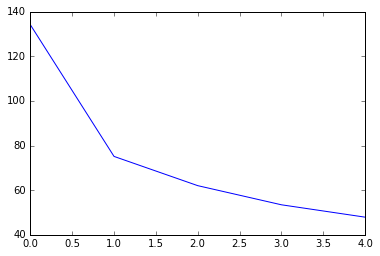

In [46]:
%store -r initial_rep
plt.plot([var for (cent,var) in initial_rep]) 

In [ ]:
# #initialize and fit the cluster model
# k_means_rep = KMeans(init = 'k-means++', n_clusters=4, n_init=10) 
# #fitting the model
# basic_rep = k_means_rep.fit(users_to_clu)

In [ ]:
# %store basic_rep

In [47]:
%store -r basic_rep

In [48]:
user_all["RepLabel"] = pd.Series(basic_rep.labels_)
user_all.RepLabel.value_counts()

0    840174
3      5178
2       454
1        49
Name: RepLabel, dtype: int64

## Clustering For Active Users

In [49]:
#Select attributes for clusering with respective to activeness of users
cols_to_incl_active = ['UserID','Reputation','BadgeScoreTotal', 'BadgeCount','ActiveBadge','ActiveBadgeScore','Views','DownVotes','UpVotes','DurationInDays', 'AvgDV', 'AvgUV', 'AvgBadgeC', 'AvgBScore', 'AvgRep']
users_to_clu_act = user_all[cols_to_incl_active]
users_to_clu_act = users_to_clu_act.set_index('UserID')
users_to_clu_act_1 = users_to_clu_act[users_to_clu_act['DurationInDays']!=0] # some of them with duration in days = 0
users_to_clu_act.head()

,Reputation,BadgeScoreTotal,BadgeCount,ActiveBadge,ActiveBadgeScore,Views,DownVotes,UpVotes,DurationInDays,AvgDV,AvgUV,AvgBadgeC,AvgBScore,AvgRep
UserID,,,,,,,,,,,,,,
1.0,39716,472,269,12,25,236946,1304,3316,3046,0.428102,1.088641,0.088313,0.154957,13.038739
3.0,12405,180,116,10,19,21763,100,6516,3053,0.032755,2.134294,0.037995,0.058958,4.063217
4.0,26638,249,155,10,19,66761,96,779,3054,0.031434,0.255075,0.050753,0.081532,8.722331
5.0,35033,412,278,11,21,9788,34,778,3049,0.011151,0.255166,0.091177,0.135126,11.489997
9.0,11465,121,75,11,20,3957,4,44,3051,0.001311,0.014422,0.024582,0.039659,3.757784


In [50]:
# #determine the number of clusters to use (for active)
temp = users_to_clu_act_1.to_records().astype([('Reputation',float),('BadgeScoreTotal',float),('BadgeCount',float), ('ActiveBadge', float),('ActiveBadgeScore',float),('DownVotes', float),('UpVotes',float),('DurationInDays', float),('AvgDV',float),('AvgUV',float),('AvgBadgeC',float),('AvgBScore',float),('AvgRep',float)])
reshape = temp.view(np.float64).reshape(temp.shape + (-1,))

/Users/Ye/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Assignment between structured arrays with different field names will change in numpy 1.13.

Previously fields in the dst would be set to the value of the identically-named field in the src. In numpy 1.13 fields will instead be assigned 'by position': The Nth field of the dst will be set to the Nth field of the src array.

See the release notes for details
  from ipykernel import kernelapp as app


In [51]:
# initial_act = [cluster.vq.kmeans(reshape, i) for i in range(1,6)] # initial stored 
# %store initial_act

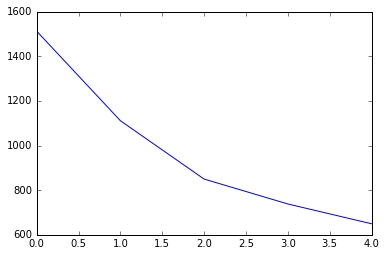

In [52]:
%store -r initial_act
plt.plot([var for (cent,var) in initial_act]) 

In [53]:
# # initialize and fit the cluster model
# k_means_active = KMeans(init = 'k-means++', n_clusters=4, n_init=10) 
# # fitting the model
# basic_active = k_means_active.fit(users_to_clu_act_1)

In [54]:
# %store basic_active

In [55]:
%store -r basic_active

In [56]:
user_all["ActiveLabel"] = pd.Series(basic_active.labels_) # attach the labels back to the original dataset 
user_all.ActiveLabel.value_counts()

1.0    824623
0.0      5217
3.0       454
2.0        49
Name: ActiveLabel, dtype: int64

In [57]:
user_all["ActiveLabel"] = user_all["ActiveLabel"].fillna(0)

## GeoLocation of Active and Reputable Users

In [58]:
import geopy as gp
from geopy.geocoders import Nominatim
import gmplot

In [59]:
user_all["Label"] = np.where(((user_all["RepLabel"] != 0) | (user_all["ActiveLabel"] != 0)), "1", "0")

In [60]:
user_all.set_index("UserID")
locations = user_all.where((user_all["Label"] != "0") & (user_all["Location"]!="0"))[["UserID", "Location"]].dropna()

In [61]:
loc = locations["Location"]
locations.head()

,UserID,Location
0,1.0,"El Cerrito, CA"
1,3.0,"Johnson City, TN, United States"
2,4.0,"New York, NY"
3,5.0,"San Diego, CA"
4,9.0,"Oakland, CA"


In [62]:
# getting the location of the users 
# for i in locations["Location"]:
#     geoloc.append(Nominatim().geocode(i, timeout = 10))

In [63]:
# lat = []
# lon = []
# lat_nadrop = []
# lon_nadrop = []
# for i in geoloc:
#     if i:
#         lat.append(i.latitude)
#         lon.append(i.longitude)
#         lat_nadrop.append(i.latitude)
#         lon_nadrop.append(i.longitude)
#     else:
#         lat.append(None)
#         lon.append(None)

In [64]:
# %store lat
# %store lon
# %store geoloc
# %store lat_nadrop
# %store lon_nadrop

In [65]:
%store -r lat
%store -r lon
%store -r geoloc
%store -r lat_nadrop
%store -r lon_nadrop

In [66]:
user_all["GeoLocation"] = pd.Series(geoloc, index=loc.index)
user_all["GeoLocation_Lat"] = pd.Series(lat, index=loc.index)
user_all["GeoLocation_Lon"] = pd.Series(lon, index=loc.index)

In [67]:
#Plot the geoheatmap
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)
gmap.heatmap(lat_nadrop, lon_nadrop, dissipating=False)
gmap.draw("ActiveRepUsers.html")

In [68]:
user_all.head()

,Score_x,UserID,ansCounts,AvgAnsScore,Score_y,qnsCounts,AvgQnsScore,BadgeScoreTotal,Badges,ReputableBadge,...,AvgUV,AvgRep,AvgBadgeC,AvgBScore,RepLabel,ActiveLabel,Label,GeoLocation,GeoLocation_Lat,GeoLocation_Lon
0,232.0,1.0,13.0,17.846154,58.0,3.0,19.333333,472,"[Nice Answer, Good Answer, Disciplined, Notabl...",112,...,1.088641,13.038739,0.088313,0.154957,3,0.0,1,"(El Cerrito, Contra Costa County, California, ...",37.915406,-122.301411
1,71.0,3.0,6.0,11.833333,NaN,NaN,NaN,180,"[Civic Duty, Nice Answer, Scholar, Citizen Pat...",25,...,2.134294,4.063217,0.037995,0.058958,0,1.0,1,"(NYC, New York, United States of America, (40....",40.730599,-73.986581
2,52.0,4.0,19.0,2.736842,79.0,3.0,26.333333,249,"[Guru, Nice Answer, Nice Question, Popular Que...",57,...,0.255075,8.722331,0.050753,0.081532,3,0.0,1,"(San Diego, San Diego County, California, Unit...",32.717421,-117.162771
3,207.0,5.0,26.0,7.961538,25.0,4.0,6.250000,412,"[Good Answer, Nice Question, Guru, Nice Answer...",106,...,0.255166,11.489997,0.091177,0.135126,3,0.0,1,"(Raleigh, Wake County, North Carolina, United ...",35.780398,-78.639099
4,21.0,9.0,6.0,3.500000,2.0,1.0,2.000000,121,"[Good Answer, Organizer, Good Question, Popula...",18,...,0.014422,3.757784,0.024582,0.039659,0,1.0,1,"(Issaquah, King County, Washington, United Sta...",47.534878,-122.043297
